Generate a small world network with 100 nodes and calculate the hitting time distribution:

In [2]:
import os
import numpy as np
import scipy.stats
%matplotlib inline
import matplotlib.pyplot as plt
np.set_printoptions(threshold=np.inf)
N = 100 #number of nodes
K = 10 #number of initial neighbors
beta = .4

In [3]:
# hitting time calculation function
def hitting_matrix(A_matrix):
    L = np.size(A_matrix,axis = 0)
    np.fill_diagonal(A_matrix, 0)
    D_matrix = np.zeros((L,L))
    D_inv = np.zeros((L,L))
    D_sqrt = np.zeros((L,L))
    D_sqrt_inv = np.zeros((L,L))
    for i in range(L):
        D_matrix[i,i] = np.sum(A_matrix[i])
        D_inv[i,i] = 1./D_matrix[i,i]
        D_sqrt[i,i] = np.sqrt(D_matrix[i,i])
        D_sqrt_inv[i,i] = 1./D_sqrt[i,i]
    p_matrix = np.dot(D_inv, A_matrix)
    eye_matrix = np.eye(L,L)
    eye_P = eye_matrix - p_matrix

    G_Lap = np.dot(D_sqrt,eye_P)
    G_Lap_n = np.dot(G_Lap, D_sqrt_inv)

    N_1 = np.dot(D_sqrt_inv,A_matrix)
    N_matrix = np.dot(N_1, D_sqrt_inv)
    lap_matrix = D_matrix - A_matrix
    [eig_val, eig_vec] = np.linalg.eigh(G_Lap_n)
    H = np.zeros((L,L))
    d = np.sum(D_matrix)
    for i in range(L):
        for j in range(L):
            deg_i = D_matrix[i,i]
            deg_j = D_matrix[j,j]
            for k in range(L):
                if eig_val[k] != min(eig_val):
                    t_i = (eig_vec[i,k]*eig_vec[i,k])/deg_i
                    t_j = (eig_vec[j,k]*eig_vec[j,k])/deg_j
                    t_ij = (eig_vec[i,k]*eig_vec[j,k])/np.sqrt(deg_i*deg_j)
                    H[i,j] = H[i,j] + d*(1./(eig_val[k]))*(t_j-t_ij)
    return H

In [4]:
def reshape_no_diag(input_matrix):
    L = np.size(input_matrix, axis = 0)
    H_vec = np.reshape(H, (1, L*L))
    for i in reversed(xrange(L)):
        H_vec = np.delete(H_vec, i*L+i)
    return H_vec

In [6]:
#adjacency matrix for small world network
def SW_network(N, K, beta):
    A = np.zeros((N,N))
    for i in range(N):
        for k in range(1,K/2+1):
            i1 = (i-k) % N
            i2 = (i+k) % N
            A[i,i1] = 1
            A[i,i2] = 1
    for i in range(N):
        for k in range(1, K/2+1):
            rand_num = np.random.rand(1,1)
            if rand_num < beta:
                j = np.random.randint(N)
                if j != i and A[i,j] == 0:
                    i2 = (i+k) % N
                    A[i,i2] = 0
                    A[i2,i] = 0
                    A[i,j] = 1
                    A[j,i] = 1
    return A

In [7]:
n_bins = 100
H_vec_tot = []
for i in range(1,2):
    A = SW_network(N, K, beta)
    H = hitting_matrix(A)
    H_avg = H
    H_vec = reshape_no_diag(H)
    H_vec_tot.append(H_vec)
    [hist_avg, bins] = np.histogram(H_vec, bins = n_bins, range = [0, 300], density = True)

In [8]:
N_iter = 20
for m in range(2,N_iter):
    A = SW_network(N, K, beta)
    H = hitting_matrix(A)
    H_vec = reshape_no_diag(H)
    [hist, bins] = np.histogram(H_vec, bins = n_bins, range = [50, 250], density = True)
    bins_diff = np.diff(bins)
    H_vec_tot.append(H_vec)
    H_avg = H_avg + H
    hist_avg = hist_avg + np.array(hist)
bins_diff = np.diff(bins)
hist_avg = hist_avg/(N_iter-1)
print np.sum((hist_avg)*np.array(bins_diff))
#     print m

0.982456140351


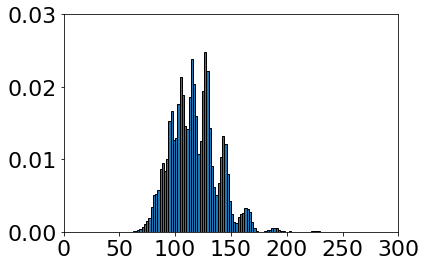

In [12]:
font = {'family': 'Arial',
        'color':  'darkred',
        'weight': 'normal',
        'size': 13,
        }
fig, ax = plt.subplots()
fig.set_size_inches(6, 4)
ax.bar(bins[:-1],hist_avg, width=np.diff(bins), ec="k", align="edge")
# ax.plot(bins[:-1], hist_avg, linewidth=2, color='r')
# plt.title("Small world", fontname="Arial", fontsize=11)
# plt.xlabel("Hitting time", fontname="Arial", fontsize=13)
# plt.ylabel("Probability distribution function", fontname="Arial", fontsize=13)
# plt.axhline(.0007, color='r', linestyle='dashed')
# plt.yticks(np.arange(0, .03,.01))
plt.axis([0, 300, 0,.03])
plt.yticks(np.arange(0, .035, step=0.01))
# plt.xticks(np.arange(0,150000,300))

# ax.plot(np.arange(0,50000,30000),np.arange(0,10,1))
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(22)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(22)
# ax.text(250, 0.1, r'Kelly skewness = 12.4', fontdict=font, color = 'black')
plt.show()
# fig.savefig('/Users/pariarezaeinia/Dropbox/PNAS/small_world_hist.png', dpi=400)